### Laboratorio: Análisis de Datos con Python

### Parte 1: Numpy:
#### Para los ejercicios siguiente genere el código que considere 
#### para resolver el problema que se le plantea.

##### 1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?
##### Ocuparian un total de 1000 bytes de memoria, porque el almacenamiento es de 0 y 1 para indicar falso o verdadero. Cada caracter ocupa 8 bits que son iguales a 1 byte. 
##### Supongamos un arreglo que tiene 500 valores falsos y 500 verdaderos. 

In [1]:
import numpy as np

# Arreglo con 500 valores True
array1_true = np.repeat(True, 500)

# Arreglo con 500 valores False
array1_false = np.repeat(False, 500)

# Concatenar los dos arreglos
array1 = np.concatenate([array1_true, array1_false])

# Tamaño del arreglo
print(array1.size)


1000


##### 2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [8]:

# Colocamos hasta 101 para que incluya el numero 100
array2 = np.arange(2, 101, 2)

# Invertimos el array
array2 = np.flip(array2)

# Comprobación del Array
print(array2)
# usamos el indice invertido para mostrar los ultimos
print(array2[-10:])



[100  98  96  94  92  90  88  86  84  82  80  78  76  74  72  70  68  66
  64  62  60  58  56  54  52  50  48  46  44  42  40  38  36  34  32  30
  28  26  24  22  20  18  16  14  12  10   8   6   4   2]
[20 18 16 14 12 10  8  6  4  2]


##### 3) Dado el array
##### 2 4 5 6
##### 0 3 7 4
##### 8 8 5 2
##### 1 5 6 1
##### Seleccione con una instrucción el subarray de elementos
##### 0 3 7 4
##### Después, seleccione el subarray de elementos
##### 2 5
##### 8 5

In [18]:
# Array3
array3 = np.array([[2, 4, 5, 6],
                  [0, 3, 7, 4],
                  [8, 8, 5, 2],
                  [1, 5, 6, 1]])

# Seleccionar el subarray de elementos 0 3 7 4
print(array3[1])


[0 3 7 4]


In [52]:

# Seleccionar el subarray de elementos 2 5, 8 5

Subarray3a = array3[0, [0,2]] 
Subarray3b = array3[2, [1,2]]
Subarray3 = np.concatenate([Subarray3a, Subarray3b])
print(Subarray3) 

[2 5 8 5]


In [54]:
#Solución B
print(Subarray3a) 
print(Subarray3b)


[2 5]
[8 5]


##### 4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).


In [58]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

#Diferencia las posicione se restan segun su contraparte
Array4 = a - b

# Calcular la media aritmética de la diferencia
print(np.mean(Array4))

-0.25


##### 5) Tengo valores de cordenadas (x, y) en las columnas del array
##### 1.33 4.5
##### 30.0 10.7
##### 70.2 0.5
##### Agregue a este array las coordenadas (37.1, -3.6). 
##### Muestre en pantalla las dimensiones del nuevo array.

In [70]:
Array5 = np.array([[1.33, 4.5],
                        [30.0, 10.7],
                        [70.2, 0.5]])

# Agregar una nueva fila al array con las coordenadas (37.1, -3.6)
agregarfila = np.array([37.1, -3.6])
Array5 = np.append(Array5, [agregarfila], axis=0)

# Mostrar las dimensiones del nuevo array
print(Array5.shape)


(4, 2)


##### 6) Copie el array del ejercicio anterior. Traspóngalo (. 
##### Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [77]:
Array6 = Array5
agregarfila = np.array([10.8, 3.0])
Array6 = np.append(Array6, [agregarfila], axis=0)
agregarfila = np.array([35.8, 12.0])
Array6 = np.append(Array6, [agregarfila], axis=0)
print(Array6)

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]
 [10.8   3.  ]
 [35.8  12.  ]]


In [79]:
Array6Transpuesto = Array6.T
print(Array6Transpuesto)

[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


### Parte 2: Exploración y Minería de Datos:
### Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

##### 1) ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("NucleosPoblacion.csv")
dataset.head()


FID            int64
OBJECTID       int64
Texto         object
Poblacion    float64
CodMun         int64
Municipio     object
CodProvin      int64
Provincia     object
X            float64
Y            float64
dtype: object

In [2]:

municipios_mas_100k = dataset.query('Poblacion > 100000')

num_municipios_mas_100k = len(municipios_mas_100k)

print("Número de municipios con más de 100000 habitantes:", num_municipios_mas_100k)


Número de municipios con más de 100000 habitantes: 62


##### 2) Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayor y responda:
##### a. ¿Cuál es la segunda ciudad más poblada?
##### b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

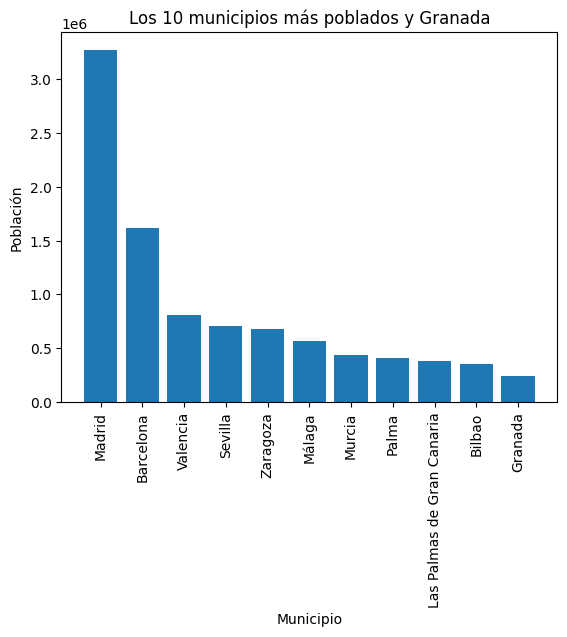

In [49]:


# Se grafican solo los municios TOP 10 y granada para tener una mejor vista por temas analiticos.  

top_municipios = dataset.nlargest(10, "Poblacion")
granada = dataset.loc[dataset["Municipio"] == "Granada"]
top_municipios = pd.concat([top_municipios, granada], ignore_index=True)


plt.bar(top_municipios["Municipio"], top_municipios["Poblacion"])
plt.xticks(rotation=90)
plt.xlabel("Municipio")
plt.ylabel("Población")
plt.title("Los 10 municipios más poblados y Granada")
plt.show()


##### a. Barcelona y b. el ultimo lugar segun este grafico o comparacion con los del top 10. 

##### 3) ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [34]:
#Extremadura está formada por dos provincias, la provincia de Badajoz y la de Cáceres.
extremadura = dataset.query("Provincia == 'Cáceres' or Provincia == 'Badajoz'")
municipios_mas_5000 = extremadura[extremadura["Poblacion"] > 5000]
print("Cantidad de municipios de Extremadura con más de 5000 habitantes: ", len(municipios_mas_5000))


Cantidad de municipios de Extremadura con más de 5000 habitantes:  14


##### 4) ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [35]:
#estamos buscando la latitud y mas alta que indica que esta mas al norte.
masalnorte = dataset.loc[dataset['Y'].idxmax()]
municipio = masalnorte['Municipio']
provincia = masalnorte['Provincia']
poblacion = masalnorte['Poblacion']
print(f"El municipio más al norte es {municipio}, en la provincia de {provincia}, con una población de {poblacion} habitantes.")


El municipio más al norte es Viveiro, en la provincia de Lugo, con una población de 16211.0 habitantes.


##### 5) Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [36]:
granada = dataset[dataset["Provincia"] == "Granada"]

poblacion_stats = granada["Poblacion"].describe()

print(poblacion_stats)


count        20.000000
mean      30217.850000
std       50355.491715
min       10386.000000
25%       13146.500000
50%       17526.000000
75%       21739.750000
max      239154.000000
Name: Poblacion, dtype: float64


##### 6) Realice un histograma con la población de los Municipios para cada una de las provincias.

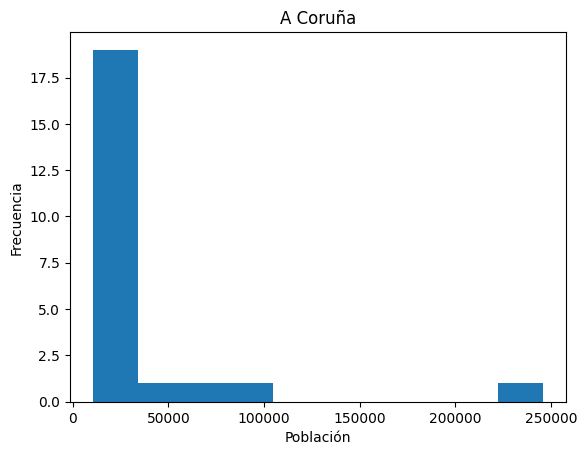

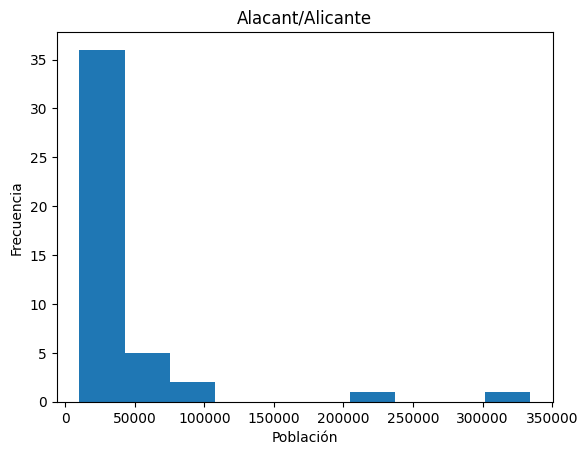

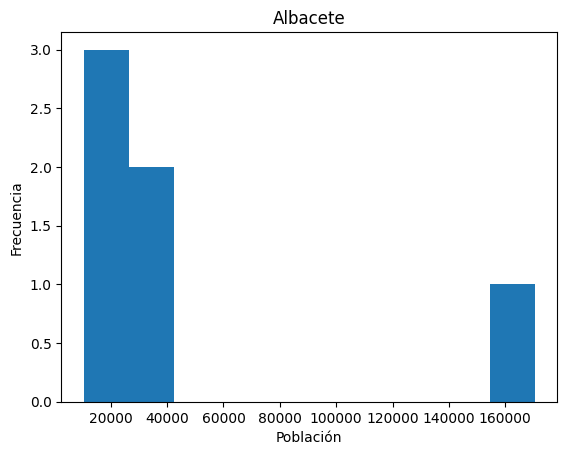

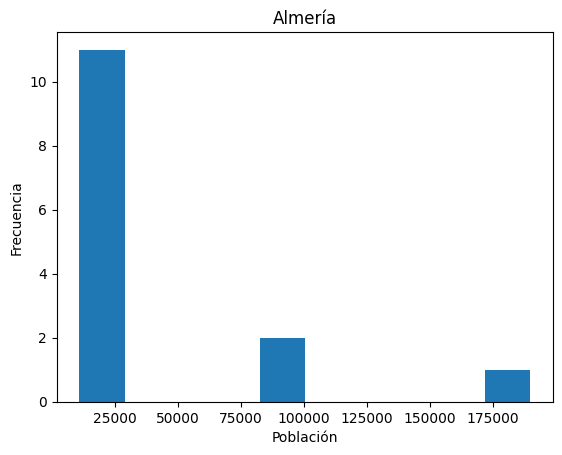

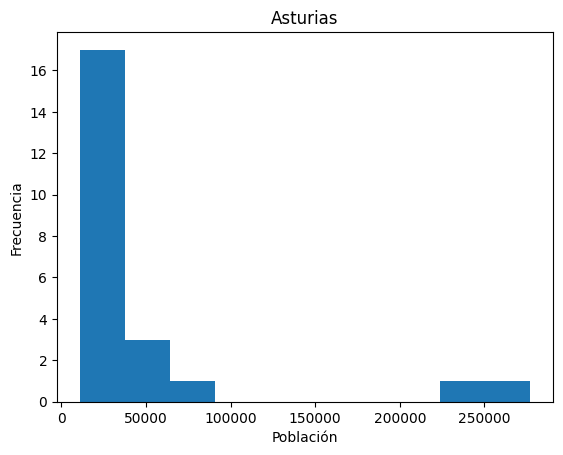

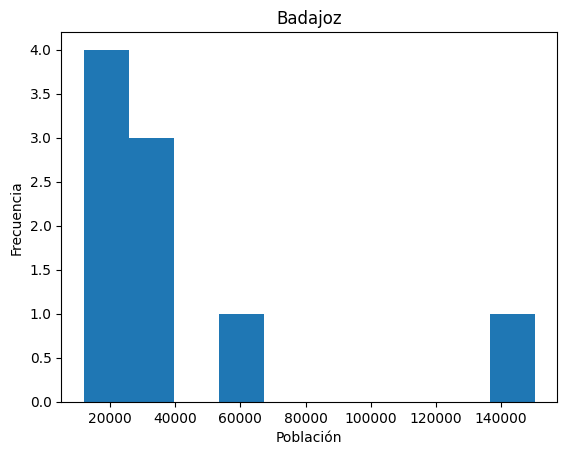

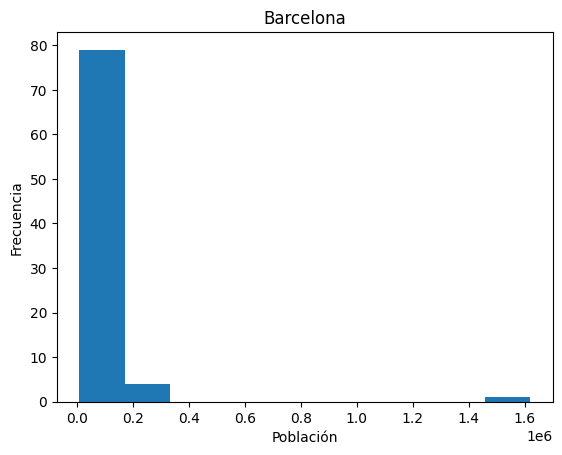

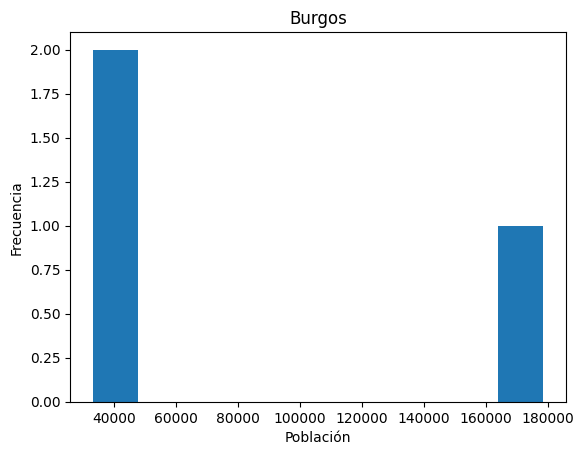

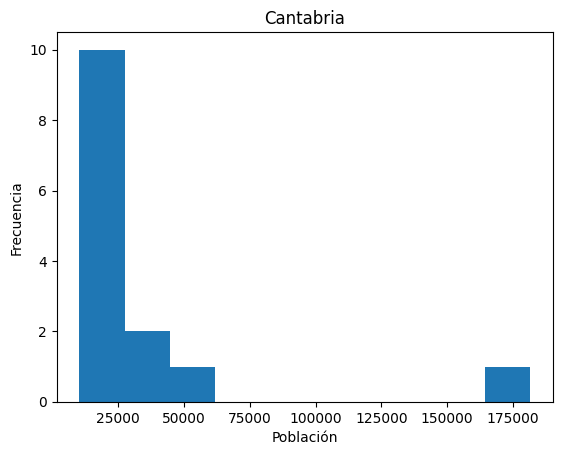

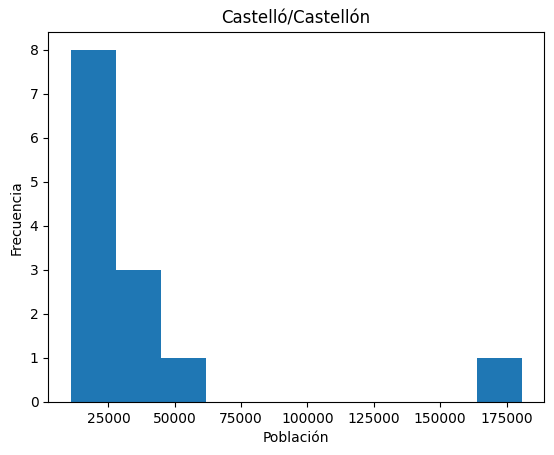

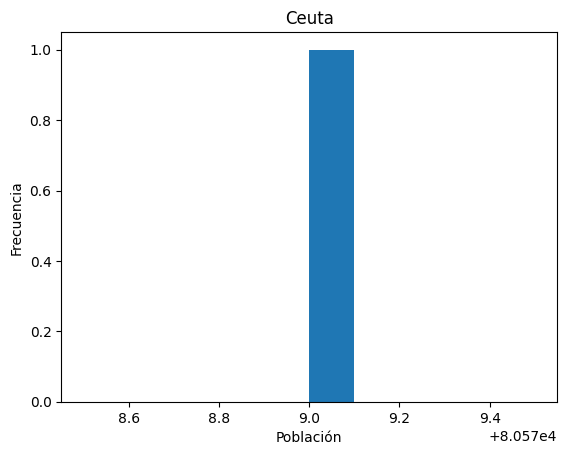

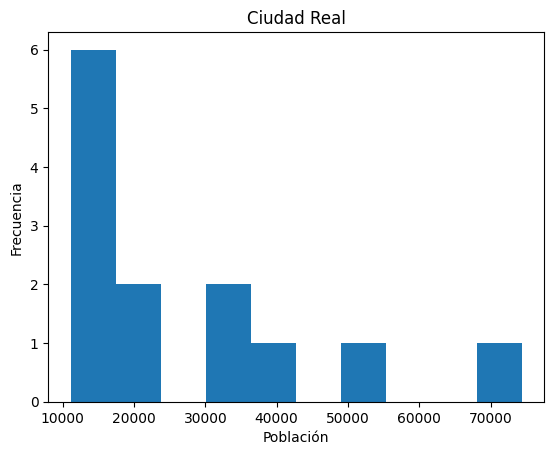

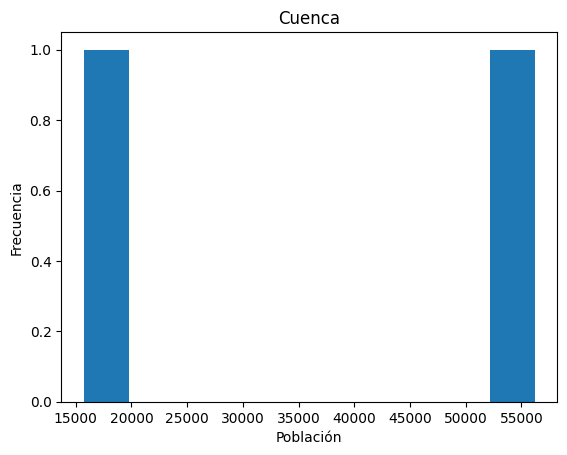

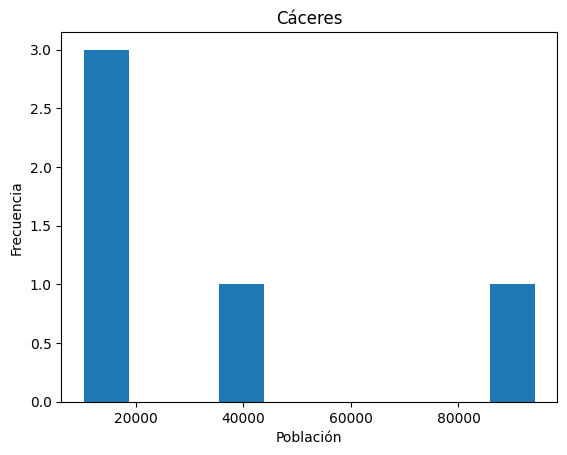

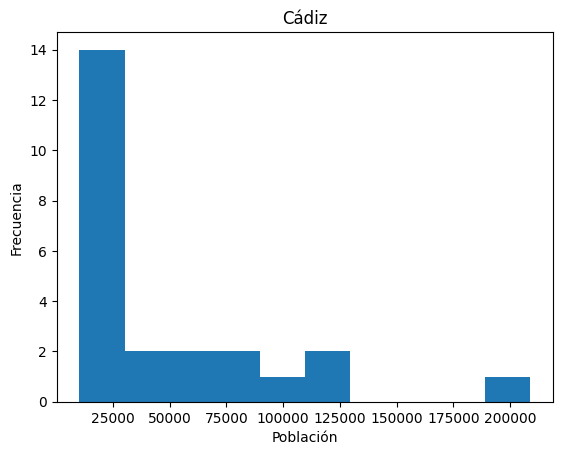

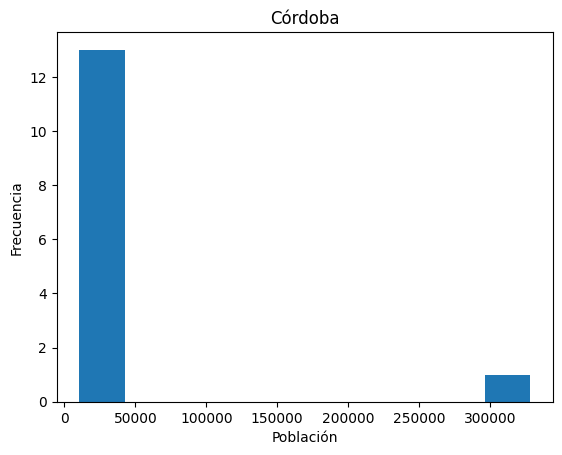

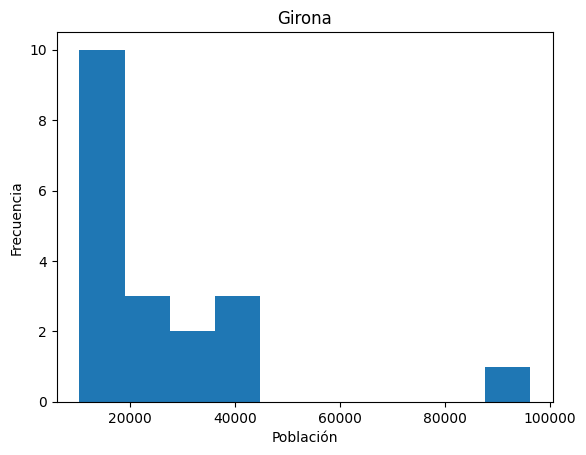

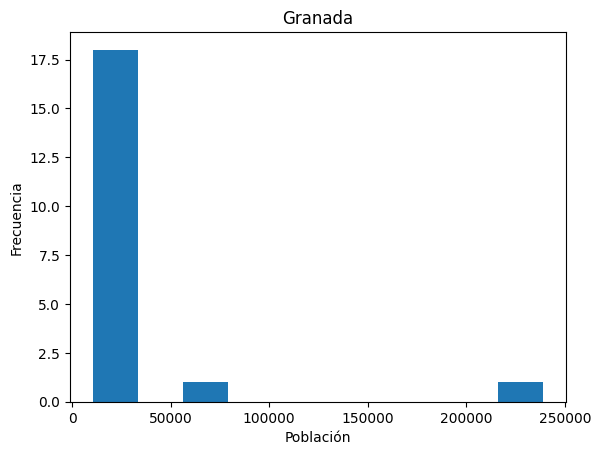

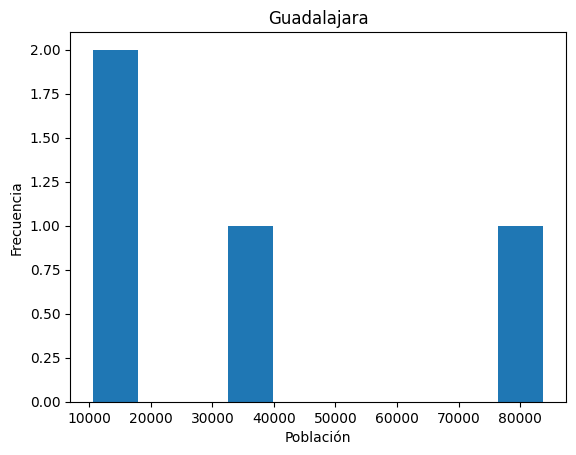

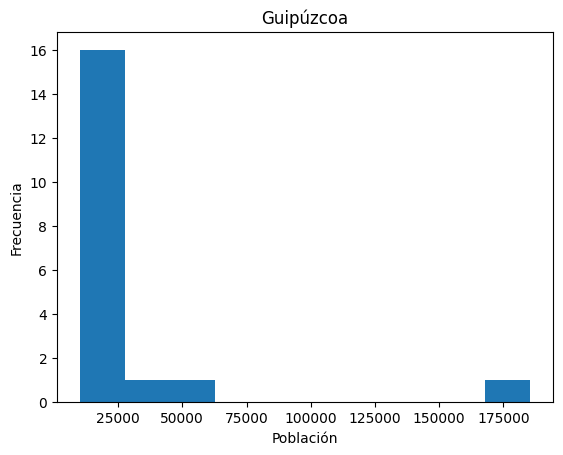

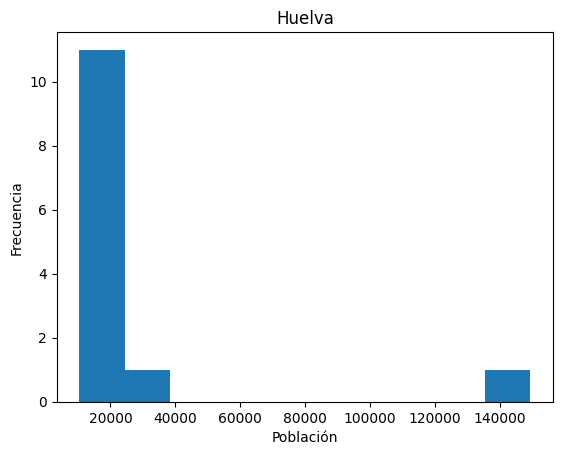

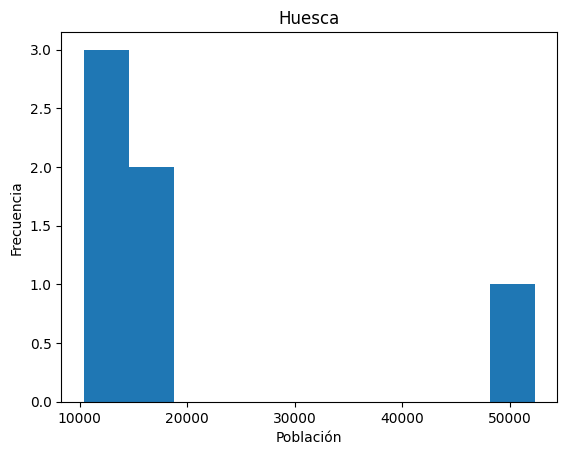

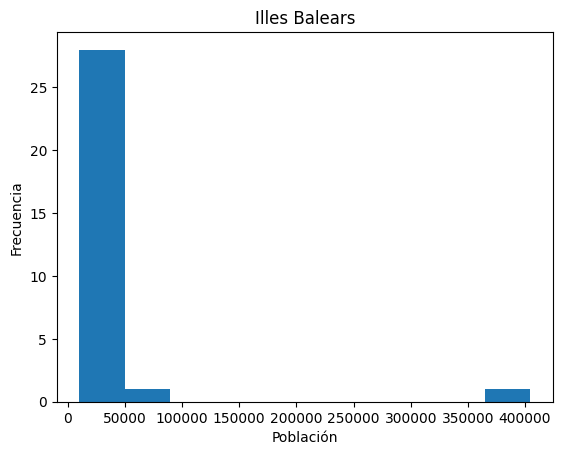

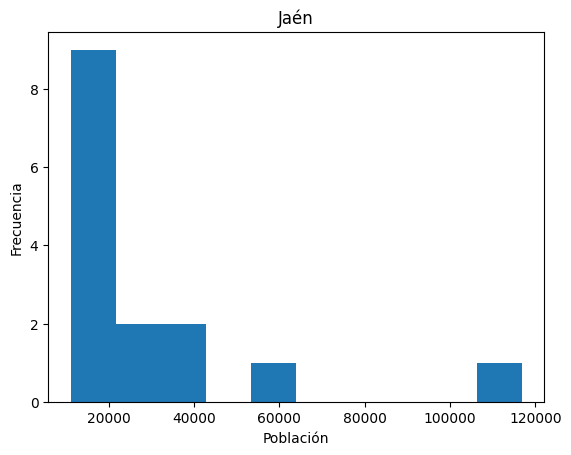

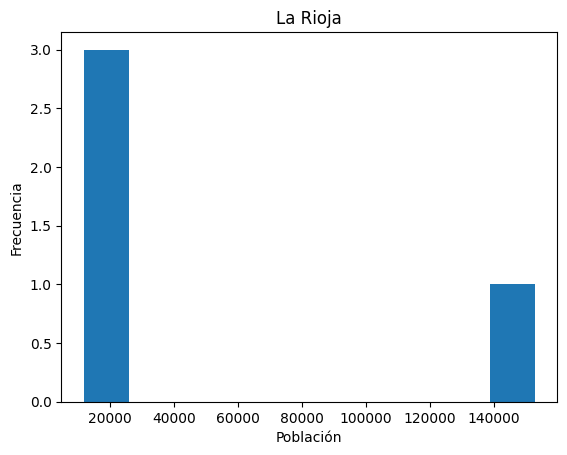

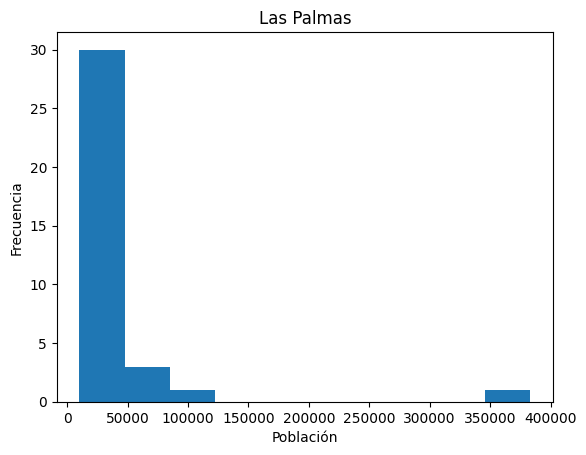

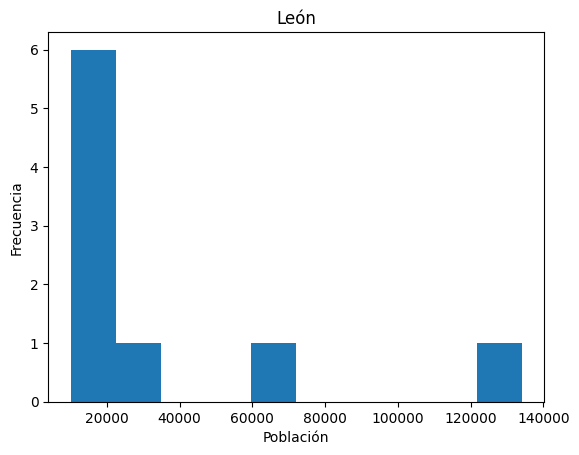

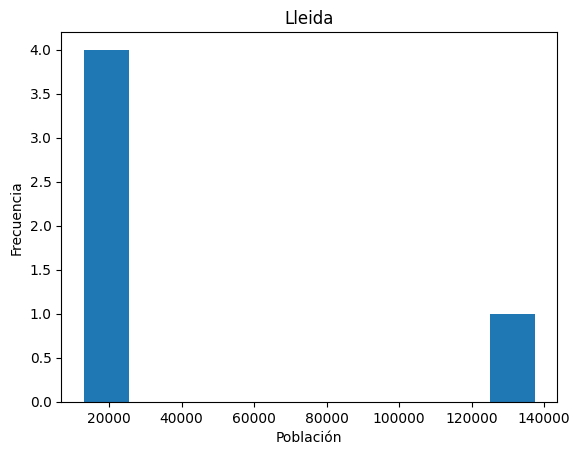

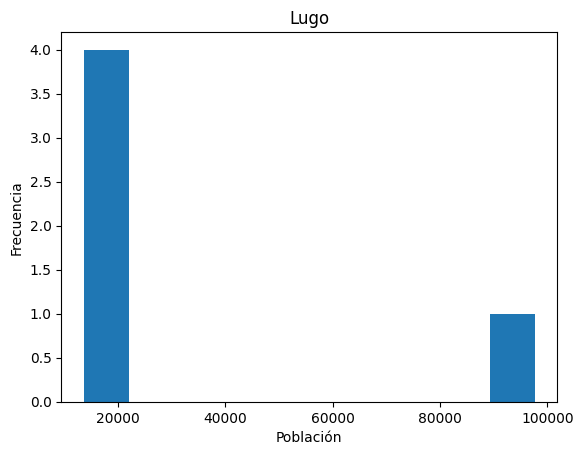

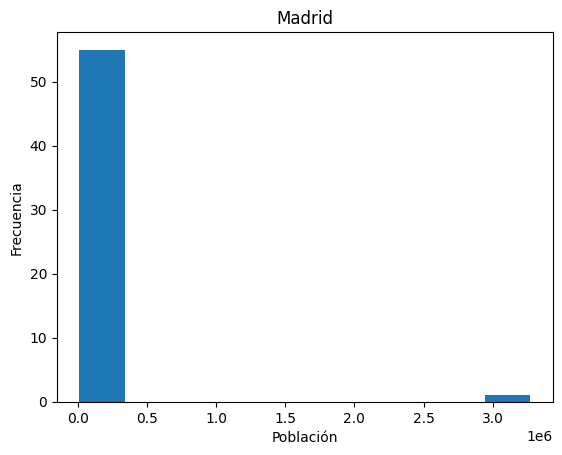

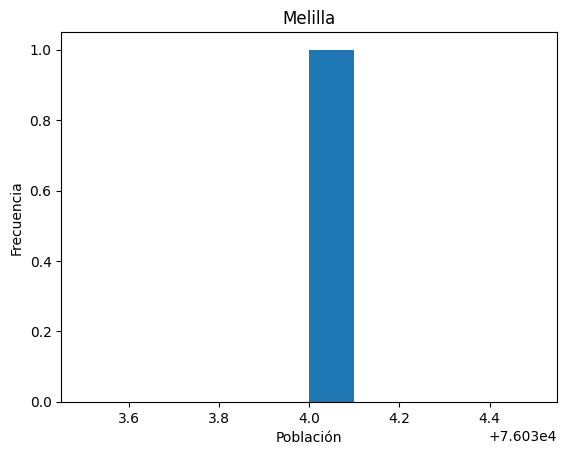

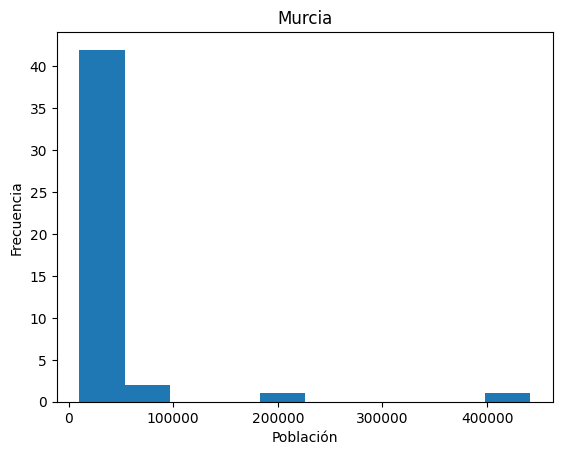

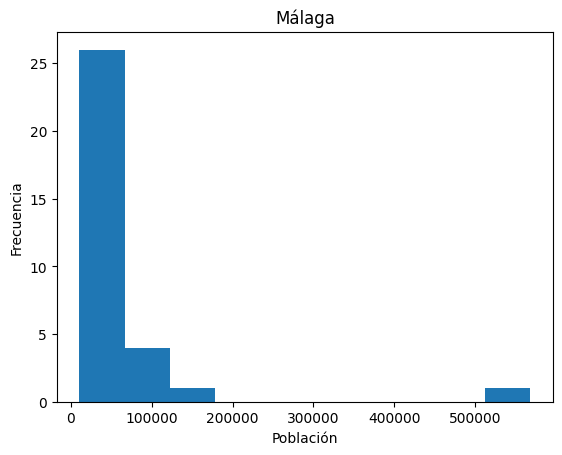

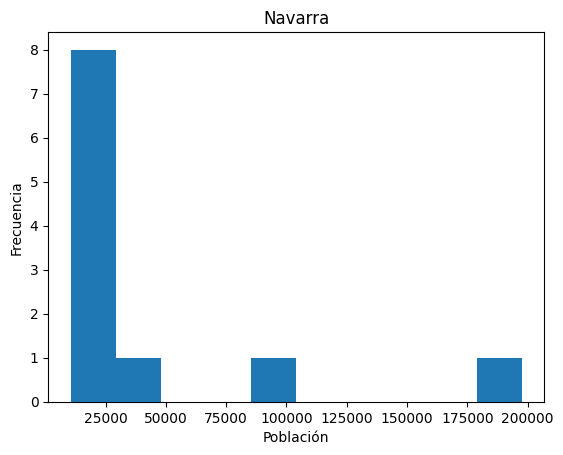

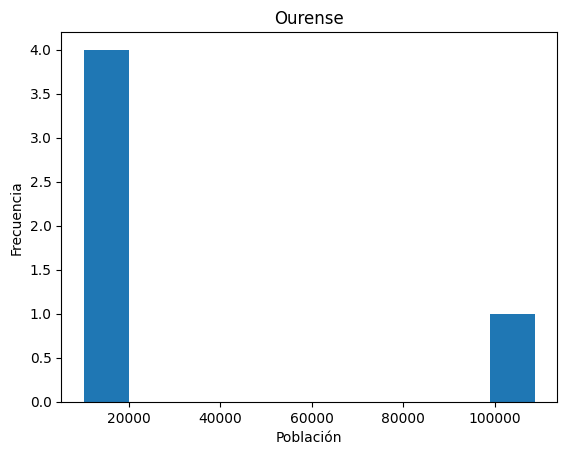

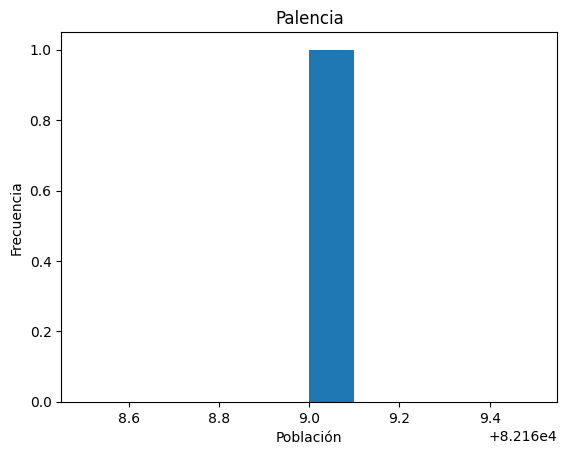

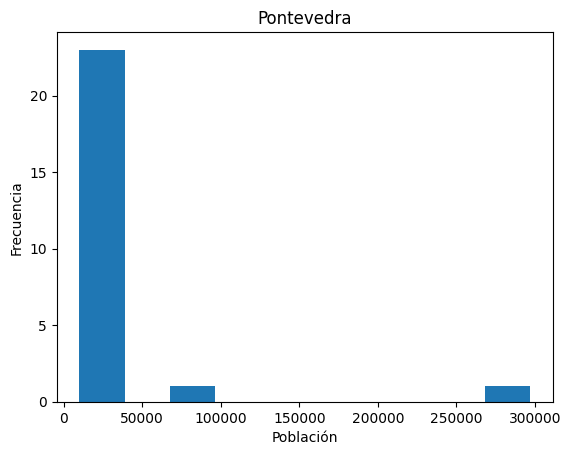

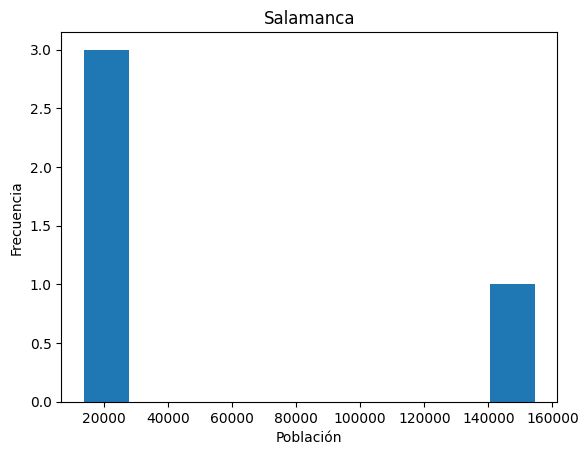

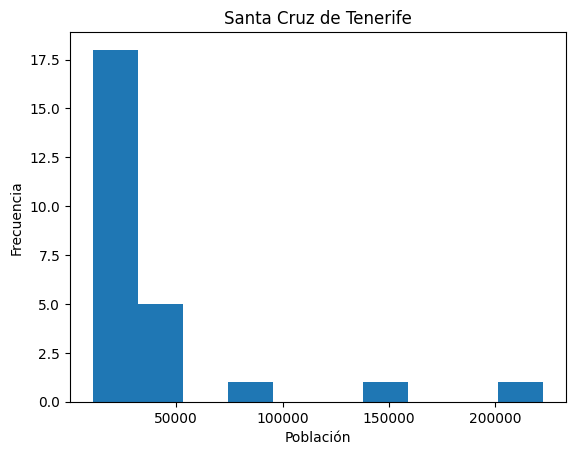

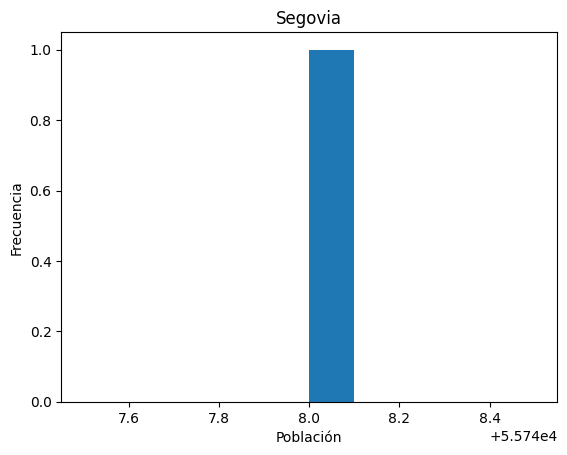

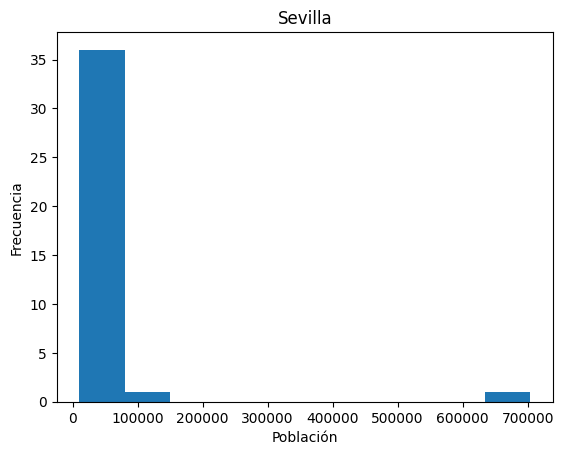

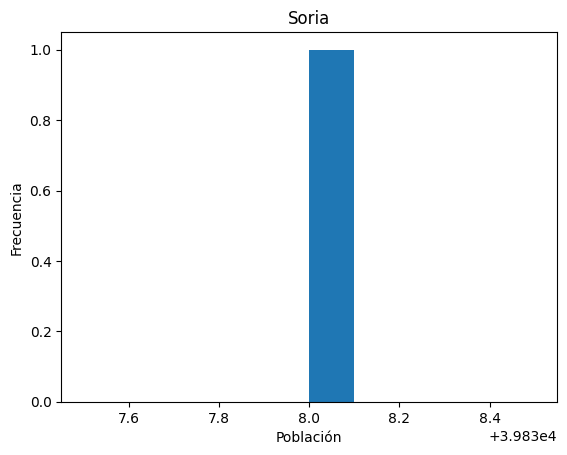

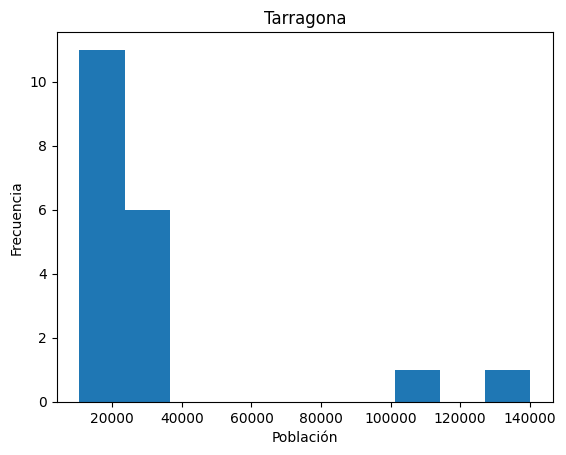

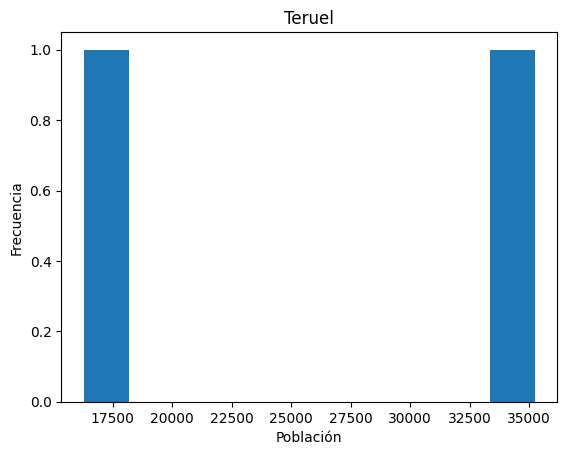

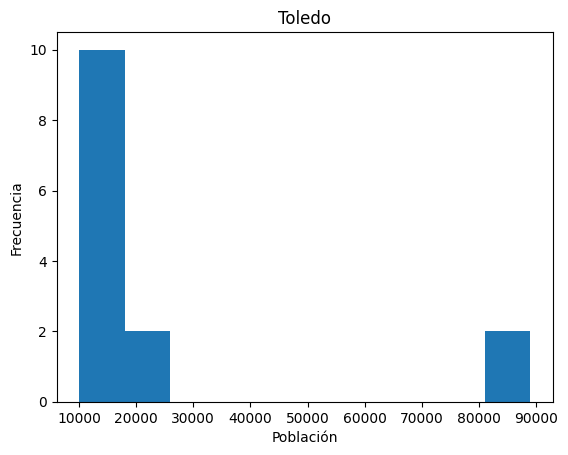

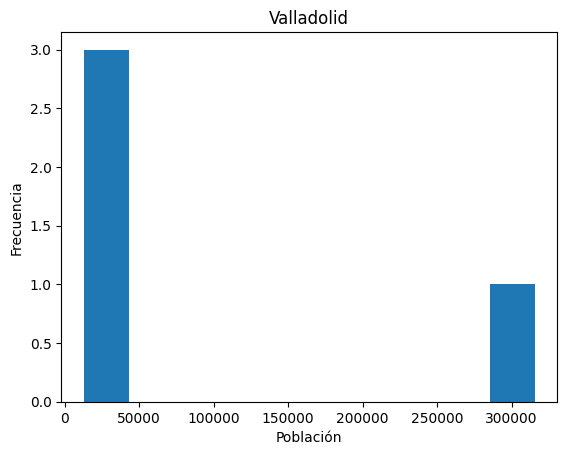

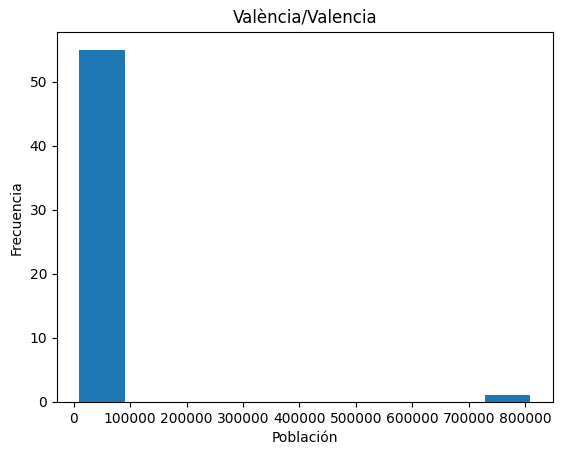

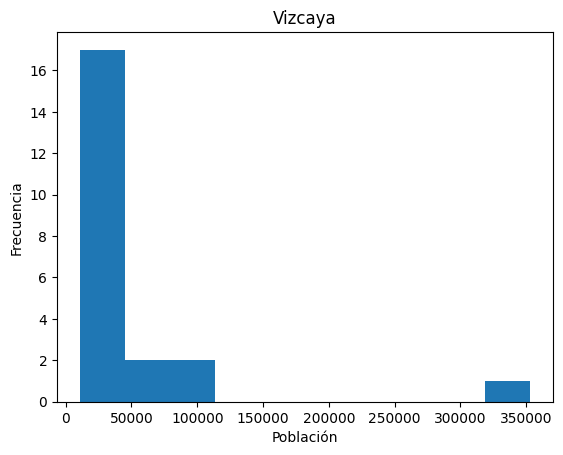

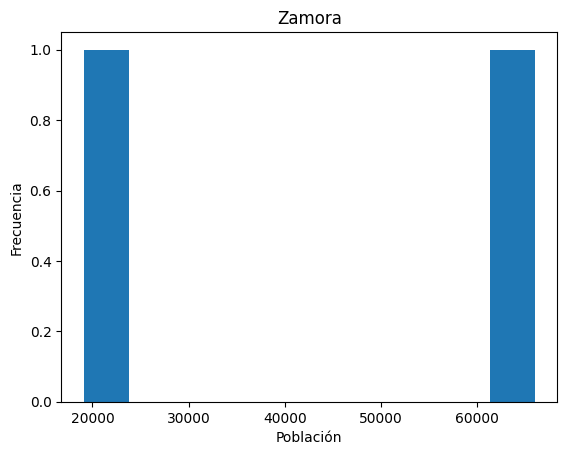

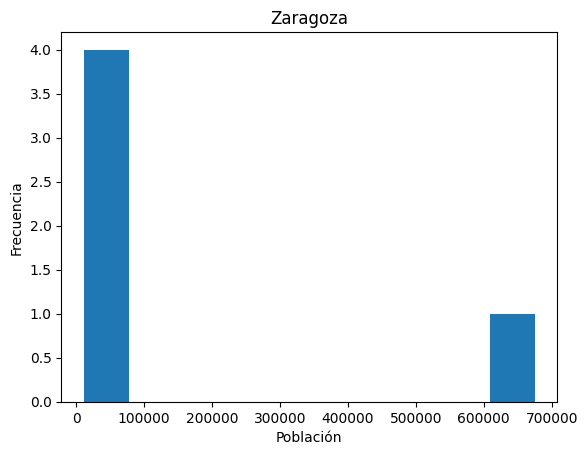

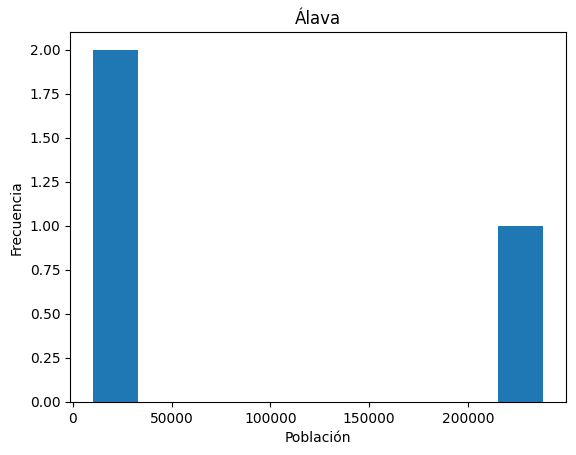

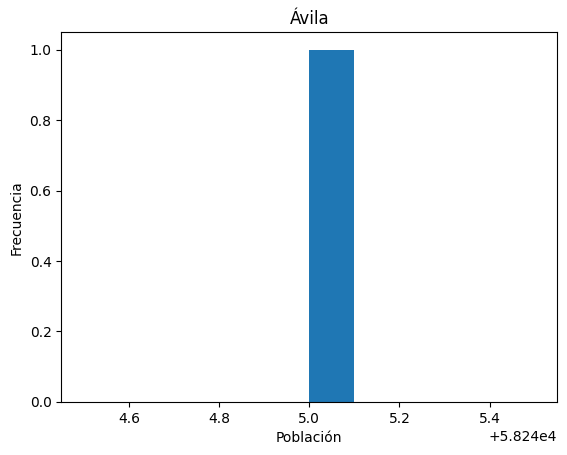

In [37]:
grouped_data = dataset.groupby('Provincia')
for name, group in grouped_data:
    plt.hist(group['Poblacion'], bins=10)
    plt.title(name)
    plt.xlabel('Población')
    plt.ylabel('Frecuencia')
    plt.show()


##### 7) Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [38]:

municipios = dataset['Municipio'].unique()
muestras = pd.Series(municipios).sample(n=50, random_state=1)

subset = dataset[dataset['Municipio'].isin(muestras)]

promedio = subset['Poblacion'].mean()
desv_estandar = subset['Poblacion'].std()

print("Promedio de la población: ", promedio)
print("Desviación estándar de la población: ", desv_estandar)


Promedio de la población:  31679.23076923077
Desviación estándar de la población:  36122.309098023514


##### 8) Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [44]:
from math import radians, cos, sin, asin, sqrt


madrid = dataset.loc[dataset['Municipio'] == 'Madrid']
x_madrid = madrid['X'].values[0]
y_madrid = madrid['Y'].values[0]

madrid_lat, madrid_lon = radians(y_madrid), radians(x_madrid)

# Calcular la distancia entre Madrid y cada municipio
distances = []
for index, row in dataset.iterrows():
    if row["Municipio"] != "Madrid":
        lat, lon = radians(row["Y"]), radians(row["X"])
        dlon = lon - madrid_lon 
        dlat = lat - madrid_lat 
        a = sin(dlat/2)**2 + cos(lat) * cos(madrid_lat) * sin(dlon/2)**2
        c = 2 * asin(sqrt(a)) 
        distance = 6371 * c  # Radio de la tierra en kilómetros
        distances.append(distance)
    else:
        distances.append(None)

dataset["Distance to Madrid"] = distances

mascercam = dataset.loc[dataset["Distance to Madrid"].idxmin()]["Municipio"]
maslejosm = dataset.loc[dataset["Distance to Madrid"].idxmax()]["Municipio"]

print("Municipio más cercano a Madrid:", mascercam)
print("Municipio más lejano a Madrid:", maslejosm)


Municipio más cercano a Madrid: Pozuelo de Alarcón
Municipio más lejano a Madrid: Los Llanos de Aridane
